# Isomap Faces

El siguiente ejemplo esta basado en el set de datos del paper original de Tenenbaum et al, que representa un conjunto de imagenes de rostros en distintas poses y condiciones de luz.

Isomap es de utilidad cuando mapping no lineal entre la informacion que tenemos representada en una gran cantidad de dimensiones y el manifold de menor dimension en el que queramos representar los datos.

En particular Isomap **es mejor que los metodos lineales para lidiar con imagenes reales y motion tracking.**

En este caso haremos un reduccion a dos dimensiones para poder representarlo graficamente en 2D y al mismo tiempo, incluiremos en el plot algunas de las imagenes para tener una nocion de que estan representando esas dimensiones.

In [2]:
# https://github.com/iqbalu/3D_Pose_Estimation_CVPR2016/tree/master/tools_intern/toolboxes/isomap
import math

import pandas as pd
import scipy.io
pd.options.display.max_columns = 7

## Carga de datos y preprocesamiento


In [4]:
# carga de una matriz de matlab
mat = scipy.io.loadmat('face_data.mat')
df = pd.DataFrame(mat['images']).T

In [8]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: LNX86, Created on: Thu May 18 03:25:00 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X_data': array([[-7.81669039, 11.63249768,  4.98949669, ..., -0.15761409,
         -6.13858617, 10.16509492],
        [-6.41497431, -3.83386251, -2.87793725, ...,  7.87242236,
         13.21593522,  8.52082985],
        [15.51749805, 12.96227365, 27.81921752, ..., 18.35944185,
         32.82565478,  1.06143158]]),
 'Y_data': array([[39.40748137, 63.46282985,  4.29079433, ..., 19.01280751,
         94.79912446, 76.50555546],
        [15.51749805, 12.96227365, 27.81921752, ..., 18.35944185,
         32.82565478,  1.06143158]])}

In [19]:
# realizamos una serie de conversiones y preprocesamiento de los datos
num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

# rotacion de imagenes
for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)
    
print(df.head())
print(df.shape)

       0         1         2     ...   4093  4094  4095
0  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
1  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
2  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
3  0.016176  0.110754  0.384988  ...    0.0   0.0   0.0
4  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0

[5 rows x 4096 columns]
(698, 4096)


una vez realizado esto podemos considerar que contamos con 4096 dimensiones, dado que consideramos cada pixel como un feature/dimension.

Hay que tener en cuenta que si trabajamos con informacion grafica es importante que este en la misma escala en este paso.

## Aplicando Isomap

In [12]:
from sklearn import manifold
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

# indicamos 6 vecinos mas cercanos y 2 componentes principales
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(df)
manifold_2da = iso.transform(df)
# reconstruimos el dataframe para facilitar la visualizacion
manifold_2d = pd.DataFrame(manifold_2da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,-25.835723,0.561516
1,32.464268,6.976126
2,-22.096579,-5.823827
3,49.482675,30.336151
4,-41.363231,-10.821880


## Visualizando la reduccion de dimensiones

Habiendo obtenido el resultado podemos realizar un plot de estas componentes considerando que hemos reducido 4096 dimensiones a 2.

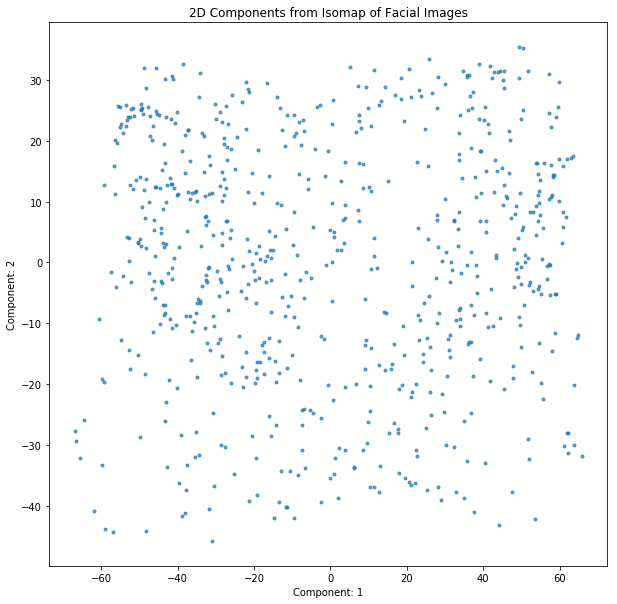

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

plt.show()

Algo interesante para lograr entender que representan 
las componentes obtenidas a partir de graficar algunas imagenes del set de datos.

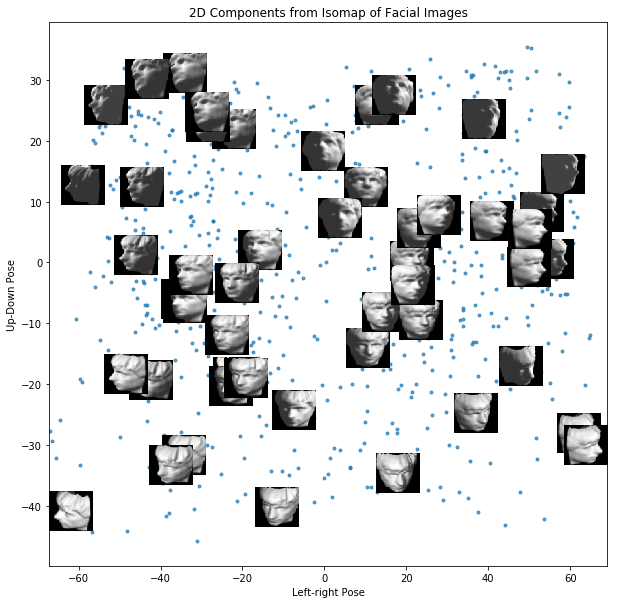

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

images_to_display = 50

x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(images_to_display):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)


ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Left-right Pose')

plt.show()

Como puede verse por las direcciones de las caras, estas componentes representas distintos puntos de vista de las caras de izquierda a derecha y de abajo hacia arriba.